In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import scipy.stats as sns
import sklearn.preprocessing as sk
import sklearn.ensemble as se
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_excel("..\A-Machine Learning\Datasets\BankChurners.xlsx")
df = df.drop(columns='CLIENTNUM')

In [4]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [6]:
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

<AxesSubplot: >

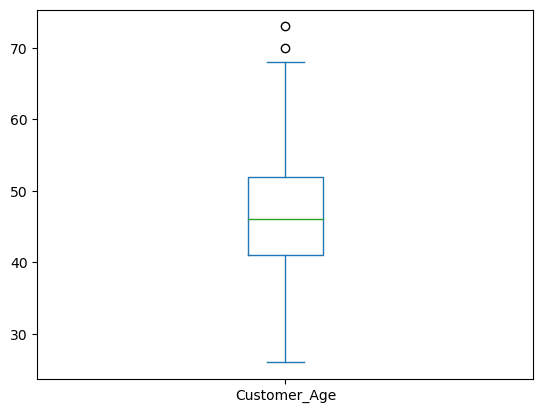

In [7]:
df['Customer_Age'].plot.box()

In [8]:
q3 = np.quantile(df['Customer_Age'], 0.75)
q1 = np.quantile(df['Customer_Age'], 0.25)
IQR = q3 - q1
eiqr = IQR*1.5
ub = q3 + eiqr
lb = q1 - eiqr
df['Customer_Age'][(df['Customer_Age']>ub) | (df['Customer_Age']<lb)] = df['Customer_Age'].median()

<AxesSubplot: >

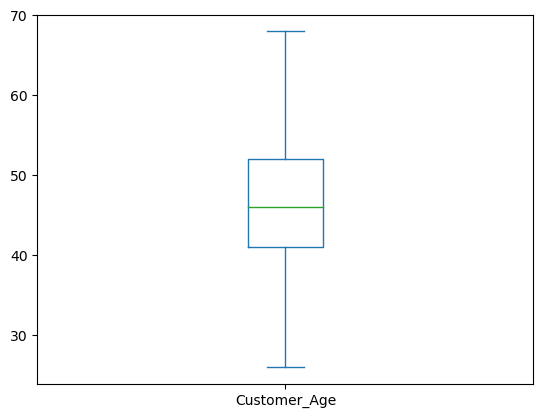

In [9]:
df['Customer_Age'].plot.box()

<AxesSubplot: ylabel='Density'>

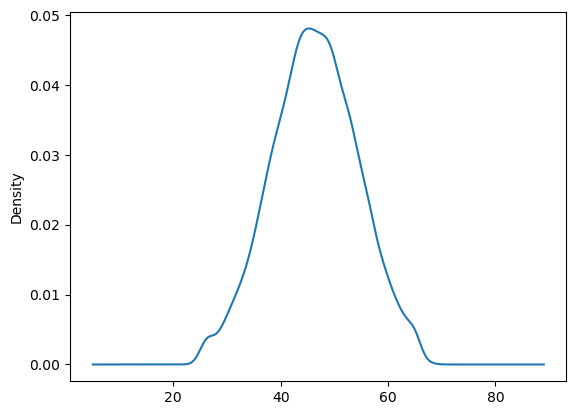

In [10]:
df['Customer_Age'].plot.density()

<AxesSubplot: xlabel='Customer_Age', ylabel='Density'>

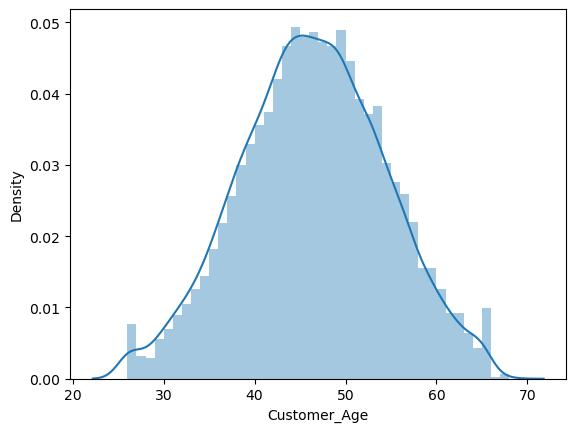

In [11]:
snb.distplot(df['Customer_Age'])

In [12]:
df['Customer_Age'].nunique()

43

In [13]:
print('Maximum Age -->',df['Customer_Age'].max())
print('Minimum Age -->',df['Customer_Age'].min())
print('Range -->',df['Customer_Age'].max() - df['Customer_Age'].min())

Maximum Age --> 68
Minimum Age --> 26
Range --> 42


In [14]:
ar = df['Customer_Age'].values.reshape(-1,1)
kb = sk.KBinsDiscretizer(n_bins=6)
kb.fit(ar)
d1 = pd.DataFrame(kb.transform(ar).toarray())
d1.drop(5, axis=1, inplace=True)
newd1 = d1.values.astype('int')
d1 = pd.DataFrame(newd1)
d1.columns = ['Age 26-33', 'Age 34-41', 'Age 42-49', 'Age 50-57', 'Age 58-55']
df = pd.concat([df,d1], axis=1)
df.drop('Customer_Age', axis=1, inplace=True)

In [15]:
df

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age 26-33,Age 34-41,Age 42-49,Age 50-57,Age 58-55
0,Existing Customer,M,3,High School,Married,$60K - $80K,Blue,39,5,1,...,1.335,1144,42,1.625,0.061,0,0,1,0,0
1,Existing Customer,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,1.541,1291,33,3.714,0.105,0,0,0,1,0
2,Existing Customer,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,2.594,1887,20,2.333,0.000,0,0,0,0,1
3,Existing Customer,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,...,1.405,1171,20,2.333,0.760,0,1,0,0,0
4,Existing Customer,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,2.175,816,28,2.500,0.000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,...,0.703,15476,117,0.857,0.462,0,0,0,0,1
10123,Attrited Customer,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,...,0.804,8764,69,0.683,0.511,0,1,0,0,0
10124,Attrited Customer,F,1,High School,Married,Less than $40K,Blue,36,5,3,...,0.819,10291,60,0.818,0.000,0,0,1,0,0
10125,Attrited Customer,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,...,0.535,8395,62,0.722,0.000,1,0,0,0,0


In [16]:
df['Gender'] = df['Gender'].apply(lambda x:0 if x=='F' else 1)
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x:0 if x=='Existing Customer' else 1)

In [17]:
df

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age 26-33,Age 34-41,Age 42-49,Age 50-57,Age 58-55
0,0,1,3,High School,Married,$60K - $80K,Blue,39,5,1,...,1.335,1144,42,1.625,0.061,0,0,1,0,0
1,0,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,1.541,1291,33,3.714,0.105,0,0,0,1,0
2,0,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,2.594,1887,20,2.333,0.000,0,0,0,0,1
3,0,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,...,1.405,1171,20,2.333,0.760,0,1,0,0,0
4,0,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,2.175,816,28,2.500,0.000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,1,2,Graduate,Single,$40K - $60K,Blue,40,3,2,...,0.703,15476,117,0.857,0.462,0,0,0,0,1
10123,1,1,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,...,0.804,8764,69,0.683,0.511,0,1,0,0,0
10124,1,0,1,High School,Married,Less than $40K,Blue,36,5,3,...,0.819,10291,60,0.818,0.000,0,0,1,0,0
10125,1,1,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,...,0.535,8395,62,0.722,0.000,1,0,0,0,0


In [18]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [19]:
pd.get_dummies(df['Marital_Status'])

,Divorced,Married,Single,Unknown
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
10122,0,0,1,0
10123,1,0,0,0
10124,0,1,0,0
10125,0,0,0,1


In [20]:
dt = pd.get_dummies(df['Marital_Status'])
dt = dt.drop(columns='Unknown')
df = pd.concat([df,dt], axis=1)
df.drop("Marital_Status", axis=1, inplace=True)

In [21]:
df

,Attrition_Flag,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age 26-33,Age 34-41,Age 42-49,Age 50-57,Age 58-55,Divorced,Married,Single
0,0,1,3,High School,$60K - $80K,Blue,39,5,1,3,...,1.625,0.061,0,0,1,0,0,0,1,0
1,0,0,5,Graduate,Less than $40K,Blue,44,6,1,2,...,3.714,0.105,0,0,0,1,0,0,0,1
2,0,1,3,Graduate,$80K - $120K,Blue,36,4,1,0,...,2.333,0.000,0,0,0,0,1,0,1,0
3,0,0,4,High School,Less than $40K,Blue,34,3,4,1,...,2.333,0.760,0,1,0,0,0,0,0,0
4,0,1,3,Uneducated,$60K - $80K,Blue,21,5,1,0,...,2.500,0.000,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,1,2,Graduate,$40K - $60K,Blue,40,3,2,3,...,0.857,0.462,0,0,0,0,1,0,0,1
10123,1,1,2,Unknown,$40K - $60K,Blue,25,4,2,3,...,0.683,0.511,0,1,0,0,0,1,0,0
10124,1,0,1,High School,Less than $40K,Blue,36,5,3,4,...,0.818,0.000,0,0,1,0,0,0,1,0
10125,1,1,2,Graduate,$40K - $60K,Blue,36,4,3,3,...,0.722,0.000,1,0,0,0,0,0,0,0


In [22]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [23]:
pd.get_dummies(df['Education_Level'])

,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
10122,0,0,1,0,0,0,0
10123,0,0,0,0,0,0,1
10124,0,0,0,1,0,0,0
10125,0,0,1,0,0,0,0


In [24]:
dt = pd.get_dummies(df['Education_Level'])
dt = dt.drop(columns='Unknown')
df = pd.concat([df,dt], axis=1)
df.drop('Education_Level', axis=1, inplace=True)

In [25]:
df

,Attrition_Flag,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Age 58-55,Divorced,Married,Single,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated
0,0,1,3,$60K - $80K,Blue,39,5,1,3,12691.0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,5,Less than $40K,Blue,44,6,1,2,8256.0,...,0,0,0,1,0,0,1,0,0,0
2,0,1,3,$80K - $120K,Blue,36,4,1,0,3418.0,...,1,0,1,0,0,0,1,0,0,0
3,0,0,4,Less than $40K,Blue,34,3,4,1,3313.0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,3,$60K - $80K,Blue,21,5,1,0,4716.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,1,2,$40K - $60K,Blue,40,3,2,3,4003.0,...,1,0,0,1,0,0,1,0,0,0
10123,1,1,2,$40K - $60K,Blue,25,4,2,3,4277.0,...,0,1,0,0,0,0,0,0,0,0
10124,1,0,1,Less than $40K,Blue,36,5,3,4,5409.0,...,0,0,1,0,0,0,0,1,0,0
10125,1,1,2,$40K - $60K,Blue,36,4,3,3,5281.0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [27]:
d=pd.get_dummies(df['Income_Category'])
d=d.drop(columns='Unknown')
df = pd.concat([df,d], axis=1)
df.drop("Income_Category", axis=1, inplace=True)

In [28]:
df

,Attrition_Flag,Gender,Dependent_count,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Doctorate,Graduate,High School,Post-Graduate,Uneducated,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K
0,0,1,3,Blue,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,0,1,0,0
1,0,0,5,Blue,44,6,1,2,8256.0,864,...,0,1,0,0,0,0,0,0,0,1
2,0,1,3,Blue,36,4,1,0,3418.0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,4,Blue,34,3,4,1,3313.0,2517,...,0,0,1,0,0,0,0,0,0,1
4,0,1,3,Blue,21,5,1,0,4716.0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,1,2,Blue,40,3,2,3,4003.0,1851,...,0,1,0,0,0,0,1,0,0,0
10123,1,1,2,Blue,25,4,2,3,4277.0,2186,...,0,0,0,0,0,0,1,0,0,0
10124,1,0,1,Blue,36,5,3,4,5409.0,0,...,0,0,1,0,0,0,0,0,0,1
10125,1,1,2,Blue,36,4,3,3,5281.0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
df['Card_Category'].value_counts()

In [ ]:
dt = pd.get_dummies(df['Card_Category'], drop_first=True)
df = pd.concat([df,dt], axis=1)
df.drop('Card_Category', axis=1, inplace=True)

In [ ]:
df

In [ ]:
df['Dependent_count'].value_counts()

In [ ]:
d = pd.get_dummies(df['Dependent_count'], drop_first=True)
d.columns = ['D1', 'D2', 'D3', 'D4', 'D5']
df = pd.concat([df,d], axis=1)
df.drop('Dependent_count', axis=1, inplace=True)

In [ ]:
df

In [ ]:
df['Months_on_book'].plot.box()

In [ ]:
df['Months_on_book'].plot.density()

In [ ]:
q3 = np.quantile(df['Months_on_book'], 0.75)
q1 = np.quantile(df['Months_on_book'], 0.25)
IQR = q3 - q1
eiqr = IQR*1.5
ub = q3 + eiqr
lb = q1 - eiqr
df['Months_on_book'][(df['Months_on_book']>ub) | (df['Months_on_book']<lb)] = df['Months_on_book'].median()

In [ ]:
df['Months_on_book'].plot.density()

In [ ]:
df['Months_on_book'].nunique()

In [ ]:
snb.distplot(df['Months_on_book'])

In [ ]:
print('Maximum Age -->',df['Months_on_book'].max())
print('Minimum Age -->',df['Months_on_book'].min())
print('Range -->',df['Months_on_book'].max() - df['Months_on_book'].min())

In [ ]:
ar = df['Months_on_book'].values.reshape(-1,1)
kb = sk.KBinsDiscretizer(n_bins=7)
kb.fit(ar)
d1 = pd.DataFrame(kb.transform(ar).toarray())
d1.drop(5, axis=1, inplace=True)
newd1 = d1.values.astype('int')
d1 = pd.DataFrame(newd1)
d1.columns = ['M 18-25', 'M 26-32', 'M 33-39', 'M 40-46', 'M 47-53']
df = pd.concat([df,d1], axis=1)
df.drop('Months_on_book', axis=1, inplace=True)

In [ ]:
df

In [ ]:
df['Total_Relationship_Count'].plot.box()

In [ ]:
df['Total_Relationship_Count'].plot.density()

In [ ]:
df['Total_Relationship_Count'].value_counts()

In [ ]:
dt = pd.get_dummies(df['Total_Relationship_Count'], drop_first=True)
dt.columns=['TRC2', 'TRC3', 'TRC4', 'TRC5', 'TRC6']
df = pd.concat([df,dt], axis=1)
df.drop('Total_Relationship_Count', axis=1, inplace=True)

In [ ]:
df

In [ ]:
df['Months_Inactive_12_mon'].plot.box()

In [ ]:
df['Months_Inactive_12_mon'].plot.density()

In [ ]:
df['Months_Inactive_12_mon'].value_counts()

In [ ]:
dt = pd.get_dummies(df['Months_Inactive_12_mon'], drop_first=True)
dt.columns=['MI1', 'MI2', 'MI3', 'MI4', 'MI5', 'MI6']
df = pd.concat([df,dt], axis=1)
df.drop('Months_Inactive_12_mon', axis=1, inplace=True)

In [ ]:
df

In [ ]:
df['Contacts_Count_12_mon'].plot.box()

In [ ]:
df['Contacts_Count_12_mon'].plot.density()

In [ ]:
df['Contacts_Count_12_mon'].value_counts()

In [ ]:
dt = pd.get_dummies(df['Contacts_Count_12_mon'], drop_first=True)
dt.columns = ['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6']
df = pd.concat([df,dt], axis=1)
df.drop('Contacts_Count_12_mon', axis=1, inplace=True)

In [ ]:
df

In [ ]:
df['Avg_Utilization_Ratio'].plot.box()

In [ ]:
df['Avg_Utilization_Ratio'].plot.density()

In [ ]:
snb.distplot(df['Avg_Utilization_Ratio'])

In [ ]:
df['Avg_Utilization_Ratio'].nunique()

In [ ]:
ar = df['Avg_Utilization_Ratio'].values.reshape(-1,1)
kb = sk.KBinsDiscretizer(n_bins=10)
kb.fit(ar)
d1 = pd.DataFrame(kb.transform(ar).toarray())
d1.drop(5, axis=1, inplace=True)
newd1 = d1.values.astype('int')
d1 = pd.DataFrame(newd1)
d1.columns = ['UR1','UR2','UR3','UR4','UR5','UR6','UR7']
df = pd.concat([df,d1], axis=1)
df.drop('Avg_Utilization_Ratio', axis=1, inplace=True)

In [ ]:
df

In [ ]:
df['Total_Ct_Chng_Q4_Q1'].plot.density()

In [ ]:
df['Total_Ct_Chng_Q4_Q1'].plot.box()

In [ ]:
q3 = np.quantile(df['Total_Ct_Chng_Q4_Q1'], 0.75)
q1 = np.quantile(df['Total_Ct_Chng_Q4_Q1'], 0.25)
IQR = q3 - q1
eiqr = IQR*1.5
ub = q3 + eiqr
lb = q1 - eiqr
df['Total_Ct_Chng_Q4_Q1'][(df['Total_Ct_Chng_Q4_Q1']>ub) | (df['Total_Ct_Chng_Q4_Q1']<lb)] = df['Total_Ct_Chng_Q4_Q1'].median()

In [ ]:
df['Total_Ct_Chng_Q4_Q1'].plot.box()

In [ ]:
df['Total_Ct_Chng_Q4_Q1'].plot.density()

In [ ]:
sc = sk.StandardScaler()
ar = df.loc[:,'Total_Ct_Chng_Q4_Q1'].to_numpy()
sc.fit(ar.reshape(-1,1))
dt = pd.DataFrame(sc.transform(ar.reshape(-1,1)))
df['Total_Ct_Chng_Q4_Q1'] = dt

In [ ]:
df['Total_Ct_Chng_Q4_Q1'].plot.density()

In [ ]:
df['Total_Trans_Ct'].plot.box()

In [ ]:
df['Total_Trans_Ct'].plot.density()
plt.axvline(x = 54)

In [ ]:
df['Total_Trans_Ct'] = df['Total_Trans_Ct'].apply(lambda x:0 if x < 54 else 1)

In [ ]:
df

In [ ]:
df['Total_Trans_Amt'].plot.box()

In [ ]:
df['Total_Trans_Amt'].plot.density()
plt.axvline(x=0)
plt.axvline(x=3050)
plt.axvline(x=6500)
plt.axvline(x=11000)

In [ ]:
x = df.loc[:,'Total_Trans_Amt']
for i in range(10127):
    if (x[i]>=0 | x[i]<3050):
        x[i] = 0
    elif (x[i]>=3050 | x[i]<6500):
        x[i] = 1
    elif (x[i]>=6500 | x[i]<11000):
        x[i] = 2
    else:
        x[i] = 3

In [ ]:
df['Total_Trans_Amt'].value_counts()

In [ ]:
dt = pd.get_dummies(df['Total_Trans_Amt'], drop_first=True)
dt.columns = ['0-3049', '3050-6500', '6500-11000']
df = pd.concat([df,dt], axis=1)
df.drop('Total_Trans_Amt', axis=1, inplace=True)

In [ ]:
df

In [ ]:
df['Total_Amt_Chng_Q4_Q1'].plot.density()

In [ ]:
df['Total_Amt_Chng_Q4_Q1'].plot.box()

In [ ]:
q3 = np.quantile(df['Total_Amt_Chng_Q4_Q1'], 0.75)
q1 = np.quantile(df['Total_Amt_Chng_Q4_Q1'], 0.25)
IQR = q3 - q1
eiqr = IQR*1.5
ub = q3 + eiqr
lb = q1 - eiqr
df['Total_Amt_Chng_Q4_Q1'][(df['Total_Amt_Chng_Q4_Q1']>ub) | (df['Total_Amt_Chng_Q4_Q1']<lb)] = df['Total_Amt_Chng_Q4_Q1'].median()

In [ ]:
sc = sk.StandardScaler()
ar = df.loc[:,'Total_Amt_Chng_Q4_Q1'].to_numpy()
sc.fit(ar.reshape(-1,1))
dt = pd.DataFrame(sc.transform(ar.reshape(-1,1)))
df['Total_Amt_Chng_Q4_Q1'] = dt

In [ ]:
df['Total_Amt_Chng_Q4_Q1'].plot.density()

In [ ]:
df['Avg_Open_To_Buy'].plot.box()

In [ ]:
df['Avg_Open_To_Buy'].plot.density()

In [ ]:
q3 = np.quantile(df['Avg_Open_To_Buy'], 0.75)
q1 = np.quantile(df['Avg_Open_To_Buy'], 0.25)
IQR = q3 - q1
eiqr = IQR*1.5
ub = q3 + eiqr
lb = q1 - eiqr
df['Avg_Open_To_Buy'][(df['Avg_Open_To_Buy']>ub) | (df['Avg_Open_To_Buy']<lb)] = df['Avg_Open_To_Buy'].median()

In [ ]:
noise = np.random.normal(0,15,10127)
df['Avg_Open_To_Buy'] = df['Avg_Open_To_Buy']+noise
df['Avg_Open_To_Buy'].plot.density()
plt.axvline(x=df['Avg_Open_To_Buy'].median())

In [ ]:
sc = sk.StandardScaler()
ar = df.loc[:,'Avg_Open_To_Buy'].to_numpy()
sc.fit(ar.reshape(-1,1))
dt = pd.DataFrame(sc.transform(ar.reshape(-1,1)))
df['Avg_Open_To_Buy'] = dt

In [ ]:
print('SKew --> ', dt.skew())
print('Krtosis --> ',dt.kurtosis())

In [ ]:
df['Avg_Open_To_Buy'].plot.density()

In [ ]:
df['Total_Revolving_Bal'].plot.box()

In [ ]:
df['Total_Revolving_Bal'].plot.density()

In [ ]:
print('Maximum Value of Total_Revolving_Bal --> ',df['Total_Revolving_Bal'].max())
print('Minimum Value of Total_Revolving_Bal --> ',df['Total_Revolving_Bal'].min())
print('Range --> ', df['Total_Revolving_Bal'].max() - df['Total_Revolving_Bal'].min())

In [ ]:
df['Total_Revolving_Bal'].nunique()

In [ ]:
ar = df['Total_Revolving_Bal'].values.reshape(-1,1)
kb = sk.KBinsDiscretizer(n_bins=10)
kb.fit(ar)
d1 = pd.DataFrame(kb.transform(ar).toarray())
d1.drop(7, axis=1, inplace=True)
newd1 = d1.values.astype('int')
d1 = pd.DataFrame(newd1)
d1.columns = ['Bal1', 'Bal2', 'Bal3', 'Bal4', 'Bal5', 'Bal6', 'Bal7']
df = pd.concat([df,d1], axis=1)
df.drop('Total_Revolving_Bal', axis=1, inplace=True)

In [ ]:
df['Credit_Limit'].plot.box()

In [ ]:
df['Credit_Limit'].plot.density()

In [ ]:
q3 = np.quantile(df['Credit_Limit'], 0.75)
q1 = np.quantile(df['Credit_Limit'], 0.25)
IQR = q3 - q1
eiqr = IQR*1.5
ub = q3 + eiqr
lb = q1 - eiqr
df['Credit_Limit'][(df['Credit_Limit']>ub) | (df['Credit_Limit']<lb)] = df['Credit_Limit'].median()

In [ ]:
noise = np.random.normal(0,15,10127)
df['Credit_Limit'] = df['Credit_Limit']+noise
df['Credit_Limit'].plot.density()
plt.axvline(x=df['Credit_Limit'].median())

In [ ]:
sc = sk.StandardScaler()
ar = df.loc[:,'Credit_Limit'].to_numpy()
sc.fit(ar.reshape(-1,1))
dt = pd.DataFrame(sc.transform(ar.reshape(-1,1)))
df['Credit_Limit'] = dt

In [ ]:
dt.plot.density()

In [ ]:
print('SKew --> ', dt.skew())
print('Krtosis --> ',dt.kurtosis())

In [ ]:
df

In [ ]:
df['Attrition_Flag'].value_counts()

In [ ]:
Y = df.loc[:,'Attrition_Flag']
X = df.iloc[:,1:]
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [ ]:
SM = SMOTE()
X_train_res, y_train_res = SM.fit_resample(xtrain,ytrain)

In [ ]:
np.unique(ytrain, return_counts=True)

In [ ]:
np.unique(y_train_res, return_counts=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
mdl5 = LogisticRegression()
mdl5.fit(X_train_res,y_train_res)
print('Cross Value Score --> ',cross_val_score(LogisticRegression(), X_train_res,y_train_res, cv=5))
print('Accuracy Score --> ',mdl5.score(X_train_res,y_train_res))

In [ ]:
mdl4 = DecisionTreeClassifier(max_depth=7)
mdl4.fit(X_train_res,y_train_res)
print('Cross Value Score --> ',cross_val_score(DecisionTreeClassifier(max_depth=7), X_train_res,y_train_res, cv=5))
print('Accuracy Score --> ',mdl4.score(X_train_res,y_train_res))

In [ ]:
mdl3 = KNeighborsClassifier()
mdl3.fit(X_train_res,y_train_res)
print('Cross Value Score --> ',cross_val_score(KNeighborsClassifier(n_neighbors=13), X_train_res,y_train_res, cv=5))
print('Accuracy Score --> ',mdl3.score(X_train_res,y_train_res))

In [ ]:
# mdl1 = SVC()
# mdl1.fit(X_train_res,y_train_res)
# print('Cross Value Score --> ',cross_val_score(SVC(gamma=1), X_train_res,y_train_res, cv=5))
# print('Accuracy Score --> ',mdl1.score(X_train_res,y_train_res))

In [ ]:
mdl2 = RandomForestClassifier()
mdl2.fit(X_train_res,y_train_res)
print('Cross Value Score --> ',cross_val_score(RandomForestClassifier(max_depth=2), X_train_res,y_train_res, cv=5))
print('Accuracy Score --> ',mdl2.score(X_train_res,y_train_res))

In [ ]:
X_F = pd.DataFrame(mdl2.predict(xtest))
X_F = pd.concat([X_F,pd.DataFrame(mdl3.predict(xtest)) ],axis=1)
X_F = pd.concat([X_F,pd.DataFrame(mdl4.predict(xtest)) ],axis=1)
X_F = pd.concat([X_F,pd.DataFrame(mdl5.predict(xtest)) ],axis=1)
X_F.columns=['RFC','KNC','DTC','LR']

In [ ]:
Y_F = pd.DataFrame(ytest)
Y_F.index = X_F.index

In [ ]:
model = sm.GLM(Y_F,X_F).fit()

In [ ]:
model.summary()